## Bài 3:
* Phân loại ảnh trong dữ liệu cifar10 (https://keras.io/api/datasets/cifar10/...).

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras import backend as K

In [158]:
batch_size = 256
num_classes = 10
epochs = 20

In [159]:
# 2. Load dữ liệu
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [160]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

### Cách 1: Chuyển về bài toán mnist, ảnh rgb -> gray image

In [161]:
x_train = x_train[:,:,:, 0]*0.299 + x_train[:,:,:, 1]*0.587 + x_train[:,:,:, 2]*0.114
x_test = x_test[:,:,:, 0]*0.299 + x_test[:,:,:, 1]*0.587 + x_test[:,:,:, 2]*0.114

In [162]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32)
(10000, 32, 32)


In [163]:
# 3. Chia lại tập traning, validation
x_val, y_val = x_train[40000:50000, :], y_train[40000:50000]
x_train, y_train = x_train[:40000, :], y_train[:40000]

In [164]:
print(x_train.shape, y_train.shape)

(40000, 32, 32) (40000, 1)


In [165]:
# 4. Reshape lại dữ liệu cho đúng kích thước input của neural network
x_train = x_train.reshape(-1, 1024) # N
x_val = x_val.reshape(-1, 1024)
x_test = x_test.reshape(-1, 1024)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

# normalize (0-1)
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'val samples')
print(x_test.shape[0], 'test samples')

40000 train samples
10000 val samples
10000 test samples


In [166]:
# 5. One-hot coding
# convert class vectors to binary class matrices
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [167]:
# Định nghĩa model
model = Sequential()
# input_shape
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_34 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                330       
Total params: 699,690
Trainable params: 699,690
Non-trainable params: 0
________________________________________________

In [168]:
# Compile model, chỉ rõ hàm loss được sử dụng, phương thức dùng để tối ưu loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam', # adam, .... gradient descent
              metrics=['accuracy'])

In [169]:
print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())

Learning rate before first fit: 0.001


In [170]:
K.set_value(model.optimizer.learning_rate, 0.008)
print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())

Learning rate before second fit: 0.008


In [171]:
# Traning, fit với data
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
157/157 [==============================] - 5s 27ms/step - loss: 2.5234 - accuracy: 0.1190 - val_loss: 2.1399 - val_accuracy: 0.2016
Epoch 2/20
157/157 [==============================] - 4s 24ms/step - loss: 2.1305 - accuracy: 0.2011 - val_loss: 2.0755 - val_accuracy: 0.2389
Epoch 3/20
157/157 [==============================] - 4s 24ms/step - loss: 2.0423 - accuracy: 0.2488 - val_loss: 2.0172 - val_accuracy: 0.2605
Epoch 4/20
157/157 [==============================] - 4s 25ms/step - loss: 1.9891 - accuracy: 0.2749 - val_loss: 1.9622 - val_accuracy: 0.2859
Epoch 5/20
157/157 [==============================] - 4s 25ms/step - loss: 1.9658 - accuracy: 0.2794 - val_loss: 1.9231 - val_accuracy: 0.3092
Epoch 6/20
157/157 [==============================] - 4s 25ms/step - loss: 1.9361 - accuracy: 0.3012 - val_loss: 1.9474 - val_accuracy: 0.2964
Epoch 7/20
157/157 [==============================] - 4s 25ms/step - loss: 1.9070 - accuracy: 0.3121 - val_loss: 1.9048 - val_accuracy: 0.3135

In [172]:
# H.history['loss'], 'accuracy', 'val_loss', 'val_accuracy'
H.history['val_accuracy']

[0.20160000026226044,
 0.23890000581741333,
 0.2605000138282776,
 0.2858999967575073,
 0.3091999888420105,
 0.2964000105857849,
 0.31349998712539673,
 0.3138999938964844,
 0.3361999988555908,
 0.328000009059906,
 0.33820000290870667,
 0.33649998903274536,
 0.33730000257492065,
 0.3224000036716461,
 0.33820000290870667,
 0.34209999442100525,
 0.35199999809265137,
 0.34709998965263367,
 0.3465000092983246,
 0.34299999475479126]

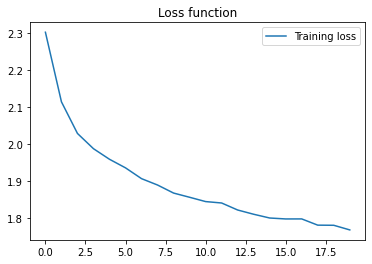

In [173]:
# Vẽ đồ thị loss của tập train
fig = plt.figure()
numOfEpoch = epochs
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='Training loss')
plt.title('Loss function')
plt.xlabel = "Epoch"
plt.ylabel = "Loss"
plt.legend()

In [174]:
# Đánh giá model với dữ liệu test
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8336511850357056
Test accuracy: 0.34299999475479126


Giá trị thật:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Giá trị dự đoán:  8


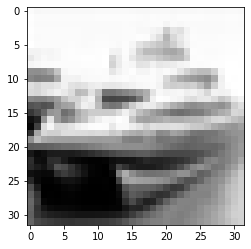

In [176]:
# 10. Dự đoán ảnh
plt.imshow(x_test[1].reshape(32,32), cmap='gray')

print('Giá trị thật: ', y_test[1])
y_predict = model.predict(x_test[1].reshape(-1, 1024))
print('Giá trị dự đoán: ', np.argmax(y_predict))